In [132]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('../datasets/final_dataset/appointments.csv')

In [134]:
## Extracting derived data from dataset

df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

df['scheduled_dow'] = df['scheduled_day'].dt.weekday_name
df = df.rename(columns={'day_of_the_week': 'appointment_dow'})

df.head()

,age,gender,scheduled_day,appointment_day,appointment_dow,status,diabetes,alcholism,hypertension,handicap,smokes,scholarship,tuberculosis,sms_received,awaiting_time,temperature,scheduled_dow
0,59,F,2013-12-30,2014-01-02,Thursday,Show-Up,1,0,1,0,0,0,0,0,-3,32.9,Monday
1,54,F,2013-12-16,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,-17,32.9,Monday
2,63,F,2013-12-02,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,0,-31,32.9,Monday
3,42,F,2013-12-18,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,32.9,Wednesday
4,66,M,2013-12-02,2014-01-02,Thursday,No-Show,0,0,0,0,0,0,0,1,-31,32.9,Monday


In [135]:
print("The shape of the DataFrame {}".format(df.shape))

The shape of the DataFrame (300000, 17)


In [136]:
percent_missing = (df.isnull().sum() / len(df)).sort_values(ascending = False)
percent_missing

scheduled_dow      0.0
alcholism          0.0
gender             0.0
scheduled_day      0.0
appointment_day    0.0
appointment_dow    0.0
status             0.0
diabetes           0.0
hypertension       0.0
temperature        0.0
handicap           0.0
smokes             0.0
scholarship        0.0
tuberculosis       0.0
sms_received       0.0
awaiting_time      0.0
age                0.0
dtype: float64

In [137]:
df['appointment_day'] = np.where((df['appointment_day'] - df['scheduled_day']).dt.days < 0, df['scheduled_day'], df['appointment_day'])

# Get the Waiting Time in Days of the Patients.
df['awaiting_time'] = df['appointment_day'] - df['scheduled_day']
df['awaiting_time'] = df['awaiting_time'].dt.days

df.head()

,age,gender,scheduled_day,appointment_day,appointment_dow,status,diabetes,alcholism,hypertension,handicap,smokes,scholarship,tuberculosis,sms_received,awaiting_time,temperature,scheduled_dow
0,59,F,2013-12-30,2014-01-02,Thursday,Show-Up,1,0,1,0,0,0,0,0,3,32.9,Monday
1,54,F,2013-12-16,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,17,32.9,Monday
2,63,F,2013-12-02,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,0,31,32.9,Monday
3,42,F,2013-12-18,2014-01-02,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,32.9,Wednesday
4,66,M,2013-12-02,2014-01-02,Thursday,No-Show,0,0,0,0,0,0,0,1,31,32.9,Monday


Text(0, 0.5, 'Probability')

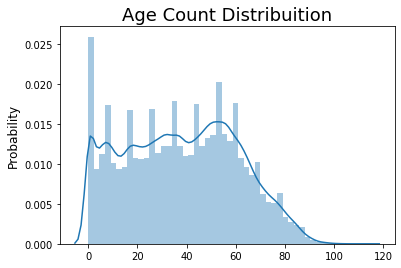

In [138]:
df = df[df.age >= 0]

g = sns.distplot(df['age'])
g.set_title("Age Count Distribuition", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=12)

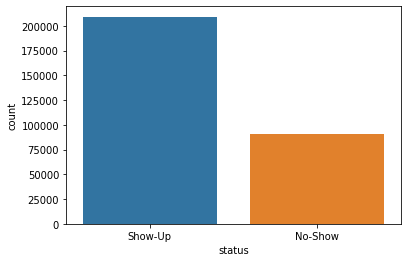

In [139]:
g = sns.countplot(df['status'])

In [140]:
# g = sns.pairplot(df);

In [141]:
print("Max value in `temperature` => {}".format(df.temperature.max()))
print("Min value in `temperature` => {}".format(df.temperature.min()))

Max value in `temperature` => 36.0
Min value in `temperature` => 20.8


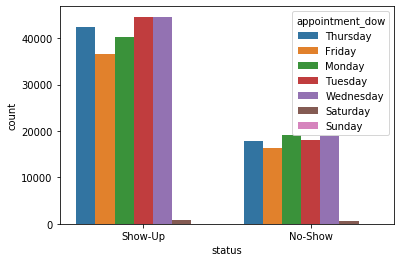

In [142]:
g = sns.countplot(x="status", hue="appointment_dow", data=df)

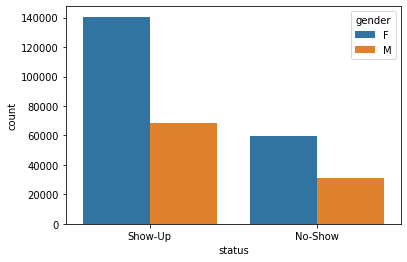

In [143]:
g = sns.countplot(x="status", hue="gender", data=df)

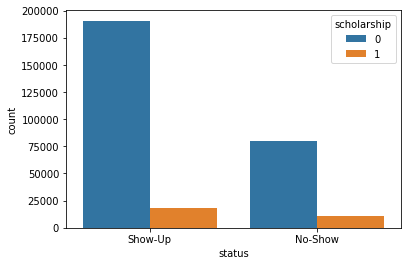

In [144]:
g = sns.countplot(x="status", hue="scholarship", data=df)

Text(0, 0.5, 'Probability')

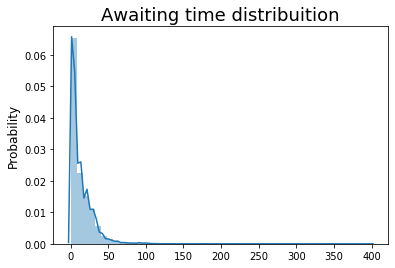

In [145]:
g = sns.distplot(df['awaiting_time'])
g.set_title("Awaiting time distribuition", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=12)

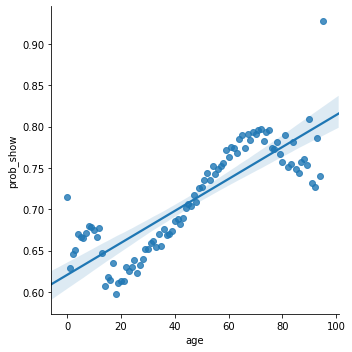

In [146]:
df = df[(df.age >= 0) & (df.age <= 95)]

def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.status).reset_index()
    df['prob_show'] = df['Show-Up'] / (df['Show-Up'] + df['No-Show'])
    return df[[group_by, 'prob_show']]

sns.lmplot(data = probStatus(df, 'age'), x = 'age', y = 'prob_show', fit_reg = True)

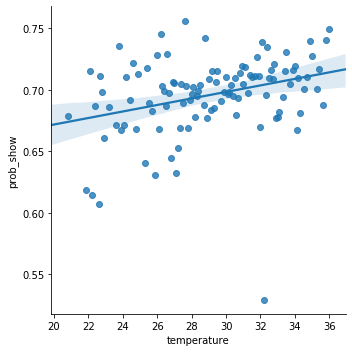

In [147]:
sns.lmplot(data = probStatus(df, 'temperature'), x = 'temperature', y = 'prob_show', fit_reg = True)

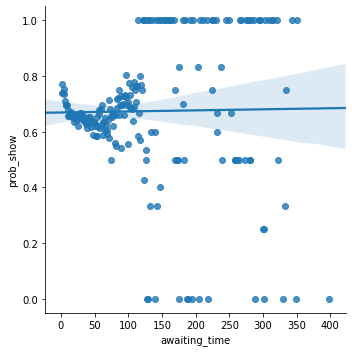

In [148]:
sns.lmplot(data = probStatus(df, 'awaiting_time'), x = 'awaiting_time', y = 'prob_show', fit_reg = True)

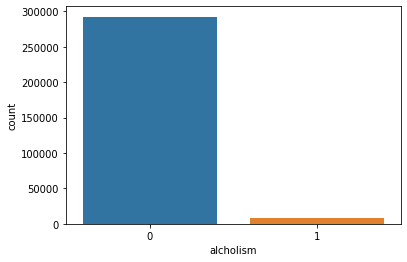

In [149]:
g = sns.countplot(df['alcholism'])

In [150]:
df = df[(df.age >= 0) & (df.age <= 95)]
df = df[df.awaiting_time < 350]

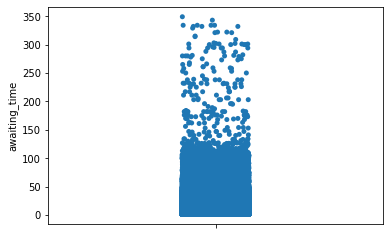

In [151]:
sns.stripplot(data = df, y = 'awaiting_time', jitter = True)

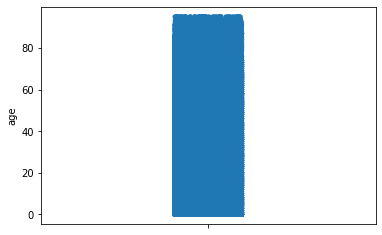

In [158]:
sns.stripplot(data = df, y = 'age', jitter = True)

In [153]:
#feature encoding
import sklearn.preprocessing as preprocessing

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,gender,appointment_dow,status,scheduled_dow
0,F,Thursday,Show-Up,Monday
1,F,Thursday,Show-Up,Monday
2,F,Thursday,Show-Up,Monday
3,F,Thursday,Show-Up,Wednesday
4,M,Thursday,No-Show,Monday


In [154]:
obj_df[obj_df.isnull().any(axis=1)]

,gender,appointment_dow,status,scheduled_dow


In [155]:
df['gender'] = preprocessing.LabelEncoder().fit_transform(df['gender'])
df['status'] = preprocessing.LabelEncoder().fit_transform(df['status'])
df['scheduled_dow'] = preprocessing.LabelEncoder().fit_transform(df['scheduled_dow'])
df['appointment_dow'] = preprocessing.LabelEncoder().fit_transform(df['appointment_dow'])
df['appointment_day'] = preprocessing.LabelEncoder().fit_transform(df['appointment_day'])
df['scheduled_day'] = preprocessing.LabelEncoder().fit_transform(df['scheduled_day'])

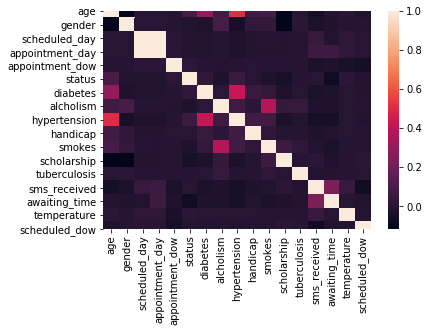

In [156]:
corr = df.corr()
sns.heatmap(corr)

In [157]:
df.to_csv('../datasets/final_dataset/appointments_preprocessed.csv')